Notebook to check that the way the shuffle is implemened does not produce any bias in the extraction of the nodes.

Taking nodes 1-100 as example and testing the function.

In [1]:
import subprocess
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def call_js_shuffle(array):
    """
    Calls the shuffle.js Node.js script with the given array,
    returns the shuffled array from stdout.
    """
    try:
        result = subprocess.run(
            ['node', 'shuffle.js', json.dumps(array)],
            capture_output=True, text=True, check=True
        )
        return json.loads(result.stdout)
    except subprocess.CalledProcessError as e:
        print("Node.js error:", e.stderr)
        return []

In [ ]:
def test_js_shuffle(n=100, trials=100000):
    """
    Tests the uniformity of the shuffle function defined in shuffle.js.
    
    Arguments:
    - n: size of array to shuffle
    - trials: how many times to repeat the shuffle
    
    Outputs:
    - heatmap visualization
    """
    print(f"Running test with n = {n}, trials = {trials}")
    
    # Initialize a list of dictionaries to count occurrences (each dictionary corresponds to a position in the shuffled array)
    position_counts = [defaultdict(int) for _ in range(n)]

    # Shuffle the array multiple times and count occurrences of each number in each position
    print("Shuffling...")
    for _ in range(trials):
        original = list(range(0, n))
        shuffled = call_js_shuffle(original)    #NOTE: original array is sliced inside the JS function, to avoid mutation
        # Check if the shuffled array has the expected length
        if len(shuffled) != n:
            print("Invalid result:", shuffled)
            continue
        # Count occurrences of each number in each position
        for index, number in enumerate(shuffled):
            position_counts[index][number] += 1

    # Prepare data for heatmap (columns are numbers of the shuffled array, rows are their positions)
    heatmap = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            heatmap[i][j] = position_counts[i][j]

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(heatmap, cmap='viridis', aspect='auto')
    plt.colorbar(label='Frequency')
    plt.title(f'JavaScript Shuffle Bias Test ({trials} trials)')
    plt.xlabel('Number')
    plt.ylabel('Position')
    plt.tight_layout()
    plt.show()

    # Calculate average relative deviation from expected uniform distribution
    expected = trials / n
    deviations = []
    for pos in position_counts:
        for count in pos.values():
            deviations.append(abs(count - expected) / expected)
    avg_dev = sum(deviations) / len(deviations)
    print(f"Average relative deviation from expected: {avg_dev:.4%}")

Running test with n = 100, trials = 100000
Shuffling...


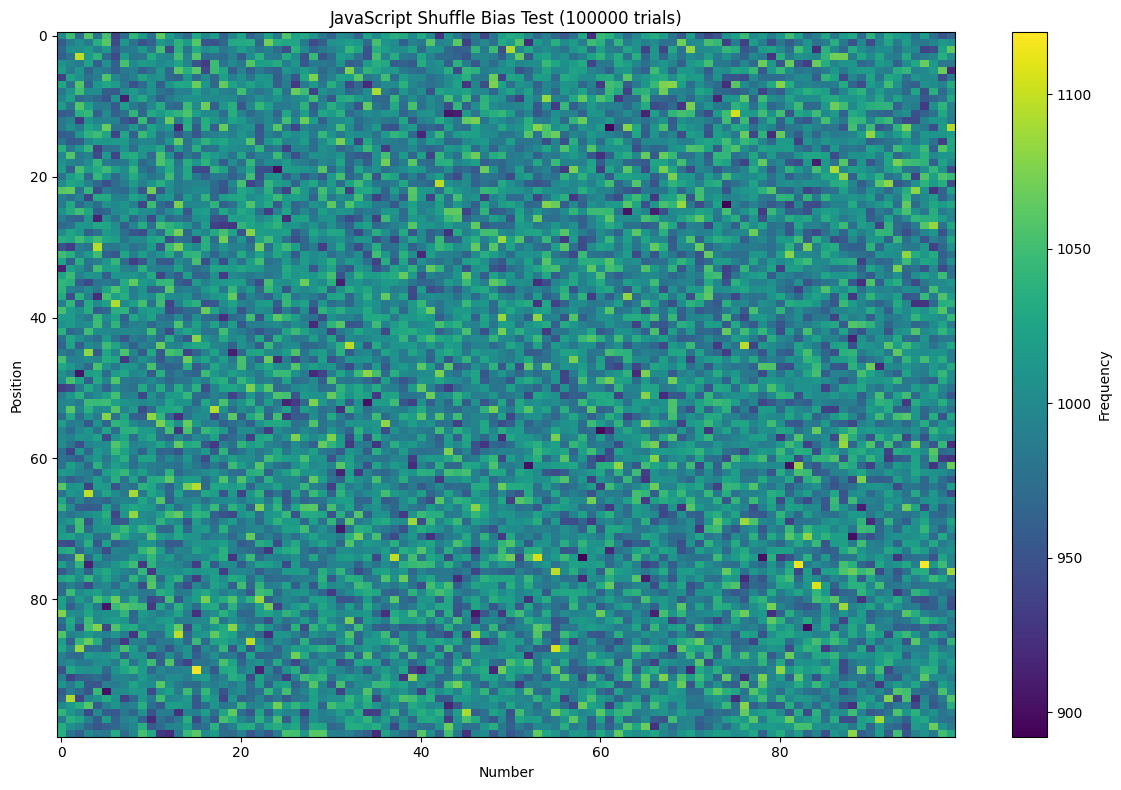

Average relative deviation from expected: 2.4992%


In [6]:
test_js_shuffle(n=100, trials=100000) 